# Chapter 3 분류 모델의 성능 개선 방법2
## 3.3 학습 방법을 바꾼다
1. 다양한 모델: SVM, KNN, 로지스틱 회귀, 앙상블 기법(랜덤포레스트, 그래디언부스트)를 활용하여 모델 성능 개선
2. 하이퍼파라미터 튜닝: GridSearchCVe를 사용하여 모델의 입력 인자를 재설정
3. 이른 종료: 과적합이 발생하여 모델의 성능이 떨어지는 것을 예방

## 3.1.1 모델 종류 변경
### 1. KNN (K Nearest Neighbor)  
**주변의 데이터를 보고 분류 진행**


- 데이터의 특징: 비슷한 특징을 가지는 데이터는 근처에 위치함  
: 즉 데이터 간의 거리가 가깝다는 것은 데이터가 서로 유사하다는 것을 의미  
- 최근접 이웃
- KNN은 데이터 간의 거리를 계산하여 연산을 진행하는 거리기반 알고리즘
- 주변에 더 많이 존재하는 유형으로 새로운 데이터 분류
- 몇 개(K)를 기준으로 사용할 것인지에 따라 결과 달라짐
- K 작게 설정: 노이즈에 민감, 과적합(Overfitting) 가능성 높아져 **분산 오류** 증가
- K 크게 설정: 디테일에 둔감, 과소적합(Underfitting) 가능성 높아져 **편향 오류** 증가

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris_df=pd.DataFrame(data = iris.data, columns= iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.drop_duplicates(keep = 'first', inplace=True)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   label              149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [6]:
X = iris_df.iloc[:,:4]
y = iris_df['label']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,stratify = y)

In [8]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X)
standard_scaled_data = standard_scaler.transform(X)
standard_scaled_df = pd.DataFrame(data = standard_scaled_data, columns= iris.feature_names)
standard_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,-2.193622e-15,-1.907497e-15,-1.525998e-15,-9.537486e-16
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-1.864149e+00,-2.436862e+00,-1.560289e+00,-1.440192e+00
25%,-8.980334e-01,-5.972549e-01,-1.219738e+00,-1.177055e+00
50%,-5.268246e-02,-1.373532e-01,3.127435e-01,1.386329e-01
75%,6.719041e-01,5.524994e-01,7.668121e-01,7.964768e-01
max,2.483370e+00,3.081959e+00,1.788466e+00,1.717458e+00


In [9]:
from sklearn.neighbors import KNeighborsClassifier

neighbor_model = KNeighborsClassifier(n_neighbors = 5) 
# n_neighbors 이웃 수 (기본 = 5)
neighbor_model.fit(X_train, y_train)
neighbor_model.score(X_test, y_test)

0.9736842105263158

### 2. SVM (Support Vector Machine)
**최적의 선을 찾아 데이터 분류하는 알고리즘**

- 종류: SVC(분류 문제), SVR(예측 문제)
- 데이터를 가장 넓게 분류할 수 있는 초평면(Optimal Hyperplane)을 최적의 선으로 정의 하고 데이터 구분
- 서포트벡터(Support Vector): 두 데이터를 구분 짓는 선을 그을 때 그 선과 가장 가깝게 위치하는 데이터
- 마진(Margin): 두 선의 간격이 가장 멀어지도록 두 선을 그은 것
- 초평면(Opimal Hyperplane), 결정경계선(Decision Boundary): 마진의 가운데 위치하는 선

- SVM: 데이터가 적을 때 우수한 성능을 보임
- 처리 데이터 양 증가 or 비정형 데이터: 복잡도 증가하여 활용 어려움
- 구불 구불 곡선 형태의 비선형 경계선을 찾을 수 없음 → 초평면을 도출할 수 있는 차원으로 변형 (1차원 → 2차원, 2차원 → 3차원 )
- 커널(Kernel)함수: 마진이 최대화된 초평면 공간으로 좌표를 매핑해주는 함수  

*클래스 사용 시 주의 사항  
: 모든 데이터 분포가 균일하다는 것을 가정하여 연산 진행 따라서 정규화 필수 (정규화 진행 여부가 정확도에 큰 영향)  
: StandardScaler 활용하여 정규화 진행  
: 정규화: 평균0, 분산1 되도록 만드는 과정 

In [10]:
from sklearn.svm import SVC

svm_model = SVC(random_state = 42)
svm_model.fit(X_train, y_train)
svm_model.score(X_test,y_test)

0.9473684210526315

### 3. 앙상블 (Ensemble)
: **여러 개의 머신러닝 모델을 조합해서 하나의 결과를 도출하는 방법**  
: 추출 방법에 따라 배깅(Bagging), 부스팅(Boosting)

**배깅 Bagging**
- 여러개의 모델을 해야함, 각각의 모델을 개별 부트스트래핑(Bootstrappping)방식으로 데이터 샘플링하여 학습
    - 예비법(Hold-Out): 중복없이 데이터 추출
    - 부트스트래핑(Bootstrappping):랜덤 샘플링으로 추출하는 방식, 중복된 데이터가 존재할 수 있다.
- 보팅(Votine)을 통해 최종 예측 결과 추출  
    [분류기(Classifier)]
    - 하드 보팅(Hard Voting): 다수결로 최종 결과값을 결정
    - 소프트 보팅(Soft Voting) 각각의 분류기에서 예측한 결과값을 레이블별 확률로 도출 → 레이블별 확률을 평균하여 최종 결과값 결정
    - 소프트 보팅이 하드보팅 보다 성능이 좋음
    
    [회귀 모델(Regressor)]
    - 최종 예측 결과를 각 회귀 모델의 예측 결과값의 평균값으로 결정

In [11]:
# Random Forest (의사결정나무의 앙상블:  의사결정나무의 과적합 취약, 낮은 성능 보완)
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
forest_model.fit(X_train, y_train)
forest_model.score(X_test,y_test)

0.9473684210526315

**부스팅(Boosting)**
- 모델 종류  
- 그래디언트 부스팅(Gradient Boosting) 오류 데이터에 가중치 부여할 때 경사하강법(Gradient Descent)를 이용하여 가중치 업데이트  
    - 경사하강법(Gradient Descent) 예측값과 실제값의 차이를 최소화하는 방향성을 가지고 반복적으로 가중치 값 업데이트 하는 방법 
- XGBoost(eXtra Gradient boost) 그래디어너트 부스팅 알고리즘을 분산 환경에서 실행할 수 있도록 구현한 라이브러리로 학습속도가 빠르다.   
- LightGBM(Light Gradient Boost)
        - XGBoost, LightGRM는 사이킷런에서 제공 X, 별도 패키지에서 사용 (코랩이 아닌 경우 별도 설치 필요)  
<Br>
    
- 이전 학습 모델 생성 시, 오분류한 데이터를 다음 학습 모델을 생성할 때 반영이 되도록 가중치 조정 작업  
    
- 그 결과 이전 학습 모델이 빌드될 때 학습 튜플로 선택되어질 가능성을 높이게 되고, 다음 모델에서 오류에 대한 보완하는 형태로 모델 생성

In [12]:
#!pip install xgboost

In [13]:
# pip install lightgbm

In [14]:
# pip install --no-binary :all: lightgbm


In [15]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   label              149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

gbm = GradientBoostingClassifier(random_state=42, n_estimators = 300)
xgb = XGBClassifier(random_state = 42, n_estimators = 300)
lgb = LGBMClassifier(random_state = 42, n_estimators = 300, verbose = -1)

model_list = [gbm, xgb, lgb]

In [17]:
 for model in model_list:
    model.fit(X_train, y_train) # fit: 데이터 최소, 최대값 기준점 정하는 과정
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 정확도: {1:.2f}'.format(model_name,score))

GradientBoostingClassifier 정확도: 0.97
XGBClassifier 정확도: 0.92
LGBMClassifier 정확도: 0.84


In [18]:
# KNN, SVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

neighbor_model = KNeighborsClassifier(n_neighbors = 5)
forest_model = RandomForestClassifier(n_estimators = 100, random_state=42)

voting_model = VotingClassifier(estimators=[('RF',forest_model),('KNN',neighbor_model)], voting='soft')

model_list = [neighbor_model,forest_model,voting_model]

for model in model_list:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 정확도: {1:.2f}'.format(model_name, score))
    

KNeighborsClassifier 정확도: 0.97
RandomForestClassifier 정확도: 0.95
VotingClassifier 정확도: 0.95


### 4. 로지스틱회귀

- 이진분류 문제에 자주 사용
- 여러번 반복하여 다중 분류에도 사용 가능
- 관측되지 않은 데이터가 들어왔을 때에도 값을 쉽게 예측 가능

**[사이킷런 LogisticRegression 클래스]**
- multi_class = auto : 이진분류,다중분류 여부 자동 판단하여 분류 모델 생성

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train,y_train)
logistic_model.score(X_test, y_test)
# fif: 데이터 최소값, 최대값 기준점 정하는 과정
# random_state: 데이터 분할 적용하기 위한 랜덤 씨드 설정

0.9473684210526315

## 3.3.2 모델 튜닝
- 하이퍼파라미터 튜닝: 최적의 셋팅값을 찾아내는 보정 작업
- 하이퍼파라미터: 머신러닝 알고리즘 에서 사람이 설정하는 값
- GridSearchCV: 이러한 작업을 수월하게 돕는 클래

**GridSearchCV**
- 학습할 모델과 변경할 하이퍼파라미터 값들의 인자로 입력받아 객체를 생성
- 학습 시 교차검증 함께 수행하기 위해 몇 개의 그룹으로 데이터를 나누어 교차검증 진행할 지 cv인자 설정

In [20]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [22]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [23]:
df.duplicated().sum()

1

In [24]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,2


In [25]:
df.drop_duplicates(keep ='first',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [26]:
# 데이터 분할
y = df['species']
X = df.drop(['species'],axis =1)

X_train, y_trian, X_test, y_test = train_test_split(X,y,random_state = 42, stratify = y)
# stratify: 지정 값의 분포를 비율에 따라 맞춤

In [27]:
# 모델:DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state = 42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
# 파라미터
param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [29]:
# 학습 - param_grid의 하이퍼파라미터 순차적으로 학습
from sklearn.model_selection import GridSearchCV

grid_trees = GridSearchCV(tree_model, param_grid=param, cv=3)
grid_trees.fit(X_train, y_train)

# cv = 교차검증 시 데이터 분할 수 (기본값 = 5)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [30]:
# 학습 결과 - GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_trees.cv_results_)
scores_df.iloc[:,6:]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675676,0.648649,0.648649,0.657658,0.012741,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675676,0.648649,0.648649,0.657658,0.012741,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.945946,0.972973,0.945946,0.954955,0.012741,1
3,"{'max_depth': 2, 'min_samples_split': 3}",0.945946,0.972973,0.945946,0.954955,0.012741,1
4,"{'max_depth': 3, 'min_samples_split': 2}",0.918919,0.972973,0.945946,0.945946,0.022067,3
5,"{'max_depth': 3, 'min_samples_split': 3}",0.918919,0.972973,0.945946,0.945946,0.022067,3


- max_depth 2가 가장 성능이 좋음
- min_sample_split 이 변할 때 스코어 변화 없음

In [31]:
# GridSearchCV 객체에서 최적의 조건으로 학습한 모델과 그때의 파라미터값, 성능
# 최적 estimator

grid_trees.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=42)

In [32]:
# 최적 파라미터
grid_trees.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [33]:
# 최적 estimator 성능
grid_trees.best_score_

0.954954954954955

## 3.3.3 이른 종료

- 과적합 발생: 학습 데이터에만 좋은 성능, 테스트 데이터 좋은 성능 보이지 못함
- 과적합 확인 방법
    - 검증용 데이터셋으로 모델 평가하여 모델 학습 상태 판단
    - 학습용 데이터 점수만 상승, 검증용 데이터 점수 하락

In [34]:
from lightgbm import LGBMClassifier

In [35]:
# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target

In [36]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [37]:
df.duplicated().sum()

1

In [38]:
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
142,5.8,2.7,5.1,1.9,2


In [39]:
df.drop_duplicates(keep ='first',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   species            149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [40]:
# 데이터 분할
y = df['species']
X = df.drop(['species'],axis =1)
# stratify: 지정 값의 분포를 비율에 따라 맞춤

In [42]:
from sklearn.model_selection import train_test_split
X_train_total, X_test, y_train_total, y_test = train_test_split(X,y, random_state =42, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_total, y_train_total, random_state = 42, stratify = y_train)
# stratify: 지정 값의 분포를 비율에 따라 맞춤

In [43]:
# LGBMClassifier 생성
lgb_model = LGBMClassifier(n_estimators=300)

In [44]:
# LGBMClassifier 생성
lgb_model.fit(X_train, y_train, early_stopping_rounds = 10, eval_set =[(X_train, y_train), (X_valid, y_valid)])

[1]	training's multi_logloss: 0.928122	valid_1's multi_logloss: 0.929386
[2]	training's multi_logloss: 0.795653	valid_1's multi_logloss: 0.797023
[3]	training's multi_logloss: 0.689149	valid_1's multi_logloss: 0.685226
[4]	training's multi_logloss: 0.601672	valid_1's multi_logloss: 0.594941
[5]	training's multi_logloss: 0.528876	valid_1's multi_logloss: 0.517547
[6]	training's multi_logloss: 0.467829	valid_1's multi_logloss: 0.454624
[7]	training's multi_logloss: 0.41655	valid_1's multi_logloss: 0.401567
[8]	training's multi_logloss: 0.372355	valid_1's multi_logloss: 0.354381
[9]	training's multi_logloss: 0.335331	valid_1's multi_logloss: 0.315912
[10]	training's multi_logloss: 0.301309	valid_1's multi_logloss: 0.281655
[11]	training's multi_logloss: 0.273194	valid_1's multi_logloss: 0.250466
[12]	training's multi_logloss: 0.250999	valid_1's multi_logloss: 0.22514
[13]	training's multi_logloss: 0.22729	valid_1's multi_logloss: 0.203073
[14]	training's multi_logloss: 0.208187	valid_1's 

LGBMClassifier(n_estimators=300)

In [45]:
# 테스트셋으로 평가
score = lgb_model.score(X_test, y_test)
print('정확도: {0:.2f}'.format(score))

정확도: 0.87


<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

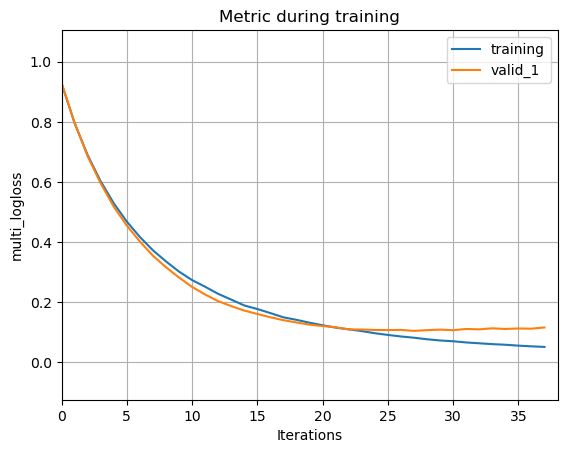

In [46]:
import lightgbm as lgb
lgb.plot_metric(lgb_model)